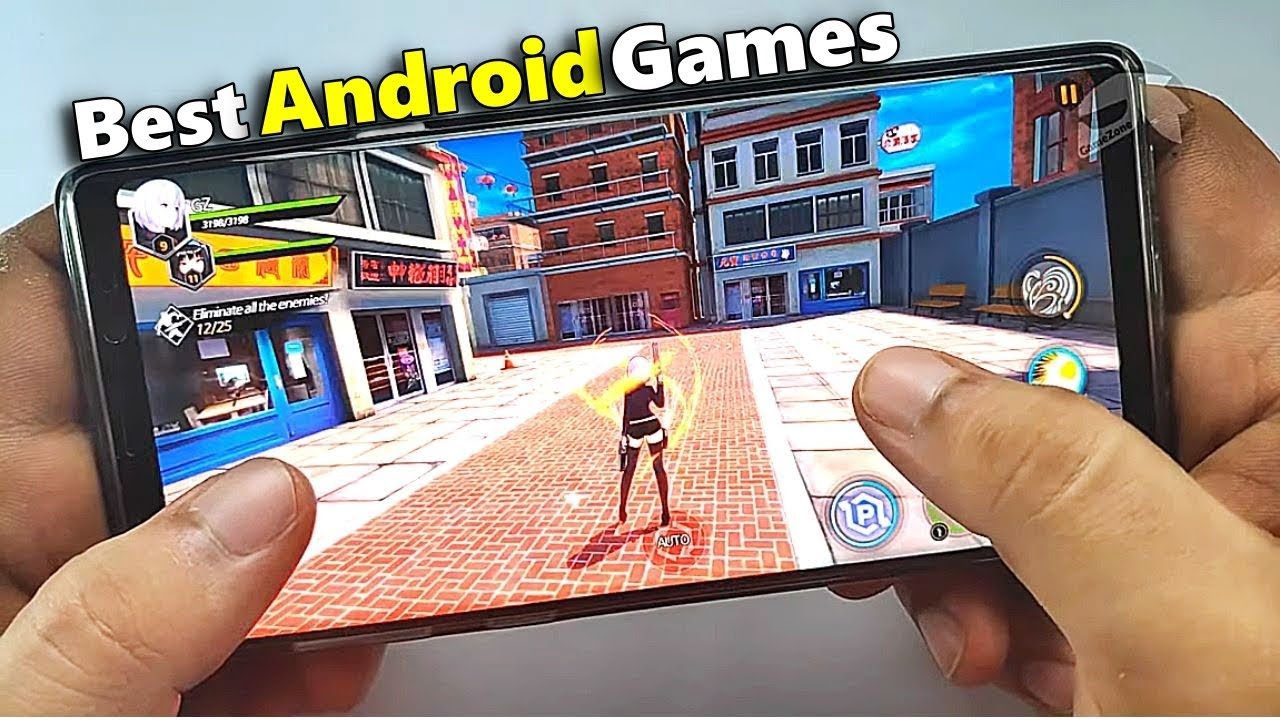

<h1 align="center"> I like to play video games </h1> <br>
<h2> But I'm never sure how much I can trust the video game ratings. They always seem to be high, and who knows? </h2>

- How long has that person had the game? 
- Was the game a fad? 

These questions I can't really answer with this dataset, but I can dive deeper into what a "good rating" really means. 

# Here are my questions...
## - What is a good rating? 
## - How can I find a hidden gem?  

Well, let's load the dataset, shall we? 

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
df = pd.read_csv('/kaggle/input/top-play-store-games/android-games.csv')

#### We'll take a sneak peak at the data to see what we're dealing with. 

In [ ]:
df.head()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = df['installs'].value_counts()
pie, ax = plt.subplots(figsize=[10,6])
labels = data.keys()
plt.pie(x=data, autopct="%.1f%%", labels=labels, pctdistance=0.5)
plt.title("Total Installs", fontsize=14)

<h2> 10 million downloads seems to be popular here. </h2>

Getting up to the 50 million dowload mark really means something...There are only 481 (Top 100) games that have been downloaded more than 10M times. 

If we find a game that's been downloaded 10M times, there's gonna be a bunch of data on it. We should also try to ignore the 500K, 100K, and 500-1000M unicorns out there. There aren't many of those in this dataset, so we'll either look at them individually or just ignore them. 

Let's take a peak at some interesting info. What about price?

In [ ]:
df.sort_values(by=['price'], ascending=False).head(10)

## Wow! 
### Only 7 of the top 100 games across all those categories are paid games. That's nuts. I had no idea. 

In [ ]:
df.sort_values(by=['1 star ratings'], ascending=False).head(3)

<h3> Ouch, it appears that these "very popular games" also have a lot of 1 star ratings. Seems normal though. </h3>

In [ ]:
df['% of 1* over 5*'] = ((df['1 star ratings'] / df['5 star ratings']) * 100).astype(float)

In [ ]:
df.sort_values(by=['% of 1* over 5*'], ascending=False).head(10)

Don't get the games above... that's for sure. 

In [ ]:
df.sort_values(by=['% of 1* over 5*'], ascending=True).head(10)

These may be okay to try. Gotta check 'em out in more detail though. 

## Now, let's look at the average rating and the number of installs to see what that shows us. 

In [ ]:
sns.set_style("whitegrid")
ax = sns.barplot(data=df, x=df['average rating'], y=df['installs'])
ax.set(xlim=(4,5))

It really appears that less is more. DUH! 1000M, 500k, and 100k downloads all have the highest <code> average rating </code> so, like I said, we should try to ignore thos games. 

In [ ]:
min_rating = df['average rating'].min()
max_rating = df['average rating'].max()
mean_rating = df['average rating'].mean()

print("min_rating:",  min_rating)
print("max_rating:",  max_rating)
print("mean_rating:",  mean_rating)

<h2> This is answer #1 "What is a good rating?" </h2>

- the LOWEST (Top 100) GAMES are at 3.09 
- the BEST (top 100) GAMES are at 4.91. 

<h1> CONCLUSION </h1> 
<h2> Anything above 4.31 would be good. <br>
    We want to shoot for 4.6+ </h2>

In [ ]:
avg_ratings_top_half = df.loc[df['average rating'] > 4.31]
avg_ratings_top_half.head(10)

### People love action games. That's a clear idea here. It's got 4 of the top ten most downloaded. 

In [ ]:
plt.figure(figsize=(20, 10))

sns.scatterplot(data=df, 
                     x=df['average rating'], 
                     y=df['total ratings'], 
                     hue=df['category'], 
                     style=df['installs'])
ax.set(xlim=(3,5))

### This is a bit messy. Let's try to clean it up a bit. We'll place multiple plots with each <code> df['category'] </code> getting their own plot

In [ ]:
# there will be 17 plots
df['category'].nunique()

<h3> *** caveat *** </h3>

It looks like I'll have to have 17 plots. That seems absurd though. I know I don't like some of the game categories already. I'll just have a looks-ski at the ones I really want to play. 

<h2> Let's take a look at my favorite 4 categories </h2>  

That's going to show us more useful information. 

In [ ]:
fig, axes = plt.subplots(2,2, sharex=True, sharey=True, figsize=(16,8))
fig.suptitle("These are My Favorite 4 Categories", size=25)

# ACTION GAME
action = df.loc[df['category']=='GAME ACTION']
axes[0,0].scatter(action['installs'], action['average rating'])
axes[0,0].set_title('Action Games')

# ADVENTURE GAME
adventure = df.loc[df['category']=='GAME ADVENTURE']
axes[0,1].scatter(adventure['installs'], adventure['average rating'], color='red')
axes[0,1].set_title('Adventure Games')

# PUZZLE GAME
puzzle = df.loc[df['category']=='GAME PUZZLE']
axes[1,0].scatter(puzzle['installs'], puzzle['average rating'], color='green')
axes[1,0].set_title('Puzzle Games')

# SIMULATION GAME
simulation = df.loc[df['category']=='GAME SIMULATION']
axes[1,1].scatter(simulation['installs'], simulation['average rating'], color='purple')
axes[1,1].set_title('Simulation Games')

Let's take a look at next 4 favorite categories. That's going to show us some more useful information. 

In [ ]:
fig, axes = plt.subplots(2,2, sharex=True, sharey=True, figsize=(16,8))
fig.suptitle("These are #5, #6, #7, #8 Categories", size=25)

# ACTION GAME
sports = df.loc[df['category']=='GAME SPORTS']
axes[0,0].scatter(sports['installs'], sports['average rating'])
axes[0,0].set_title('Sports Games')

# ADVENTURE GAME
rpg = df.loc[df['category']=='GAME ROLE PLAYING']
axes[0,1].scatter(rpg['installs'], rpg['average rating'], color='red')
axes[0,1].set_title('Role Playing Games')

# PUZZLE GAME
trivia = df.loc[df['category']=='GAME TRIVIA']
axes[1,0].scatter(trivia['installs'], trivia['average rating'], color='green')
axes[1,0].set_title('Trivia Games')

# SIMULATION GAME
word = df.loc[df['category']=='GAME WORD']
axes[1,1].scatter(word['installs'], word['average rating'], color='purple')
axes[1,1].set_title('Word Games')

It looks like Adventure and Trivia games aren't so great. Their average downloads is relatively lower than top performing games like Sports games. That's something to consider. More people like good stuff, right? 

<h3> My conclusion </h3>
The Google Play store does a pretty good job of identifying the best games. (haha, of course). So, let's get rid of the game categories I'm not likely to play, and then see what the top 10 games I should try are.  

In [ ]:
final_data = df.drop(df[df['category'] == 'GAME ARCADE'].index, inplace = True)
final_data = df.drop(df[df['category'] == 'GAME BOARD'].index, inplace = True)
final_data = df.drop(df[df['category'] == 'GAME CARD'].index, inplace = True)
final_data = df.drop(df[df['category'] == 'GAME CASINO'].index, inplace = True)
final_data = df.drop(df[df['category'] == 'GAME CASUAL'].index, inplace = True)
final_data = df.drop(df[df['category'] == 'GAME EDUCATIONAL'].index, inplace = True)
final_data = df.drop(df[df['category'] == 'GAME MUSIC'].index, inplace = True)
final_data = df.drop(df[df['category'] == 'GAME RACING'].index, inplace = True)
final_data = df.drop(df[df['category'] == 'GAME STRATEGY'].index, inplace = True)

In [ ]:
# these should be the top ten 
best_ratings = df.loc[df['average rating'] > 4.3]
best_ratings = df.loc[df['5 star ratings'] > 200000]

#the following includes Arabic Word Games (I can't play word games in Arabic, so I canceled that)
#best_ratings = df.loc[df['1 star ratings'] > 10000]
best_ratings.sort_values(by=['average rating'], ascending=False).head(10)

<h1> And that's it. </h1>
<h2> Those are my recommendations for the top 10 "hidden gem" games to try out </h2>

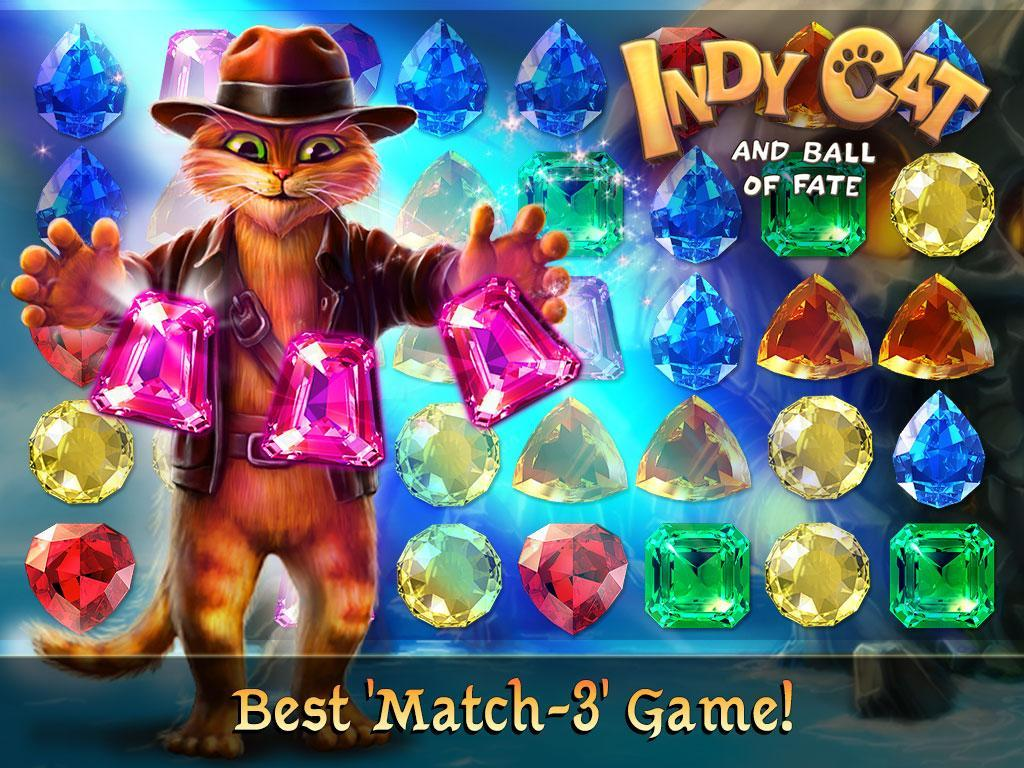